## Cadiovascular diseases data 

The dataset consists of 70 000 records of patients data in 12 features, such as age, gender, systolic blood pressure, diastolic blood pressure, and etc. The target class "cardio" equals to 1, when patient has cardiovascular desease, and it's 0, if patient is healthy.

#### Data description

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination. 


Let's look at the dataset and given variables.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv("../input/cardiovascular-disease-dataset/cardio_train.csv",sep=";")

In [2]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


All features are numerical, 12 integers and 1 decimal number (weight).

In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Age is measured in days, height is in centimeters

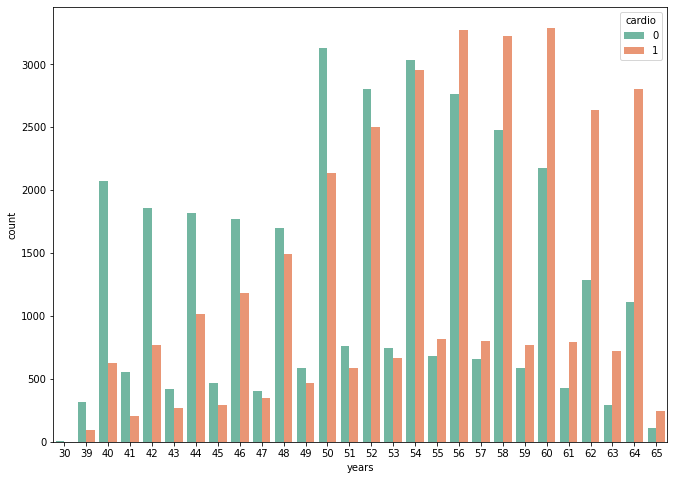

In [5]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

It can be observed that people over 55 of age are more exposed to CVD. 

Let's look at categorical variables in the dataset and their distribution:

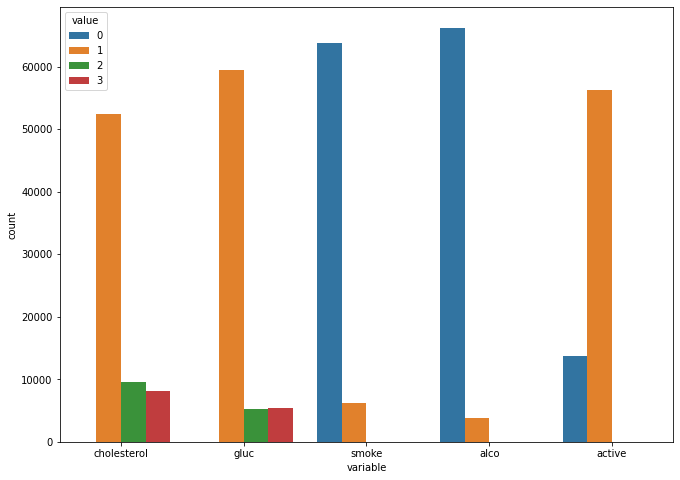

In [6]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

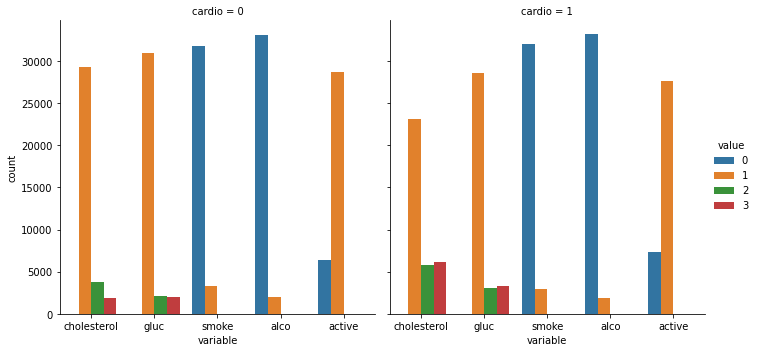

In [7]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level. And, generally speaking less active.

To figure out whether "1" stands for women or men in gender column, let's calculate the mean of height per gender. We assume that men are higher than women on average.

In [8]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

Average height for "2" gender is greater, than for "1" gender, therefore "1" stands for women. Let's see how many men and women presented in the dataset:

In [9]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

Who more often report consuming alcohol - men or women?

In [10]:
df.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

So, men consume alcohol more frequently on average. 
Next, the target variables are balanced:`

In [11]:
df['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

To see how the target class is distributed among men and women, we can use also `crosstab`

In [12]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.327343,0.172957
1,0.323086,0.176614


### Cleaning Data

Are there any `NA`s or missing values in a dataset?

In [13]:
df.isnull().values.any()

False

If we look more closely to height and weight columns, we will notice that minimum height is 55 cm and minimum weight is 10 kg. That has to be an error, since minimum age is 10798 days, which equals to 29 years. On the other hand, the maximum height is 250 cm and the highest weight is 200 kg, which might be irrelevant, when generilizing data. To deal with these errors, we can remove outliers.

Let's remove weights and heights, that fall below 2% or above 98% of a given range.

In [14]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.024))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.024))].index,inplace=True)

In addition, in some cases diastolic pressure is higher than systolic, which is also  incorrect. How many records are inaccurate in terms of blood pressure?

In [15]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [16]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.98)) | (df['ap_hi'] < df['ap_hi'].quantile(0.019))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.98)) | (df['ap_lo'] < df['ap_lo'].quantile(0.019))].index,inplace=True)

Diastolic pressure is higher than systolic one in 0 cases


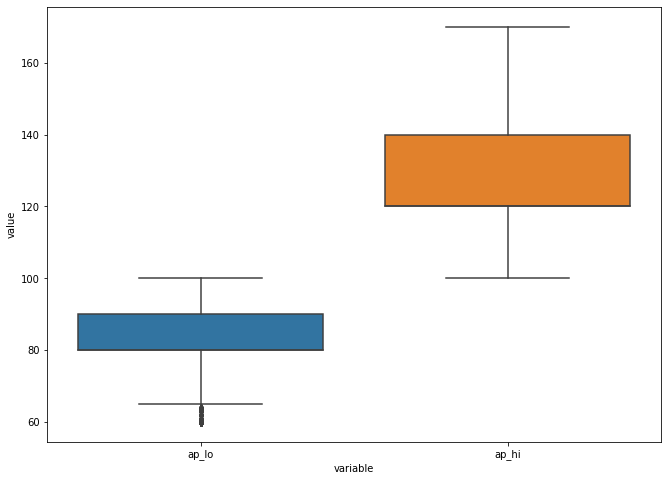

In [17]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastolic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


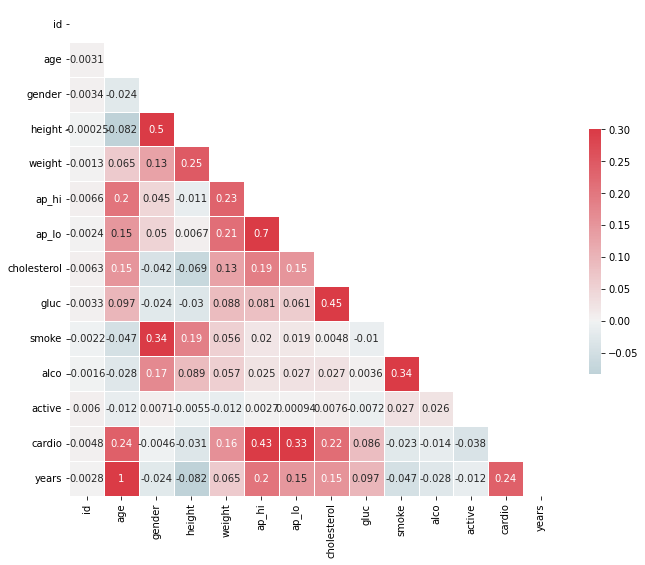

In [18]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

As we can see age and cholesterol have significant impact, but not very high correlated with target class.

Let's create `violinplot` to show height distribution across gender. Looking at the mean values of height and weight for each value of the gender feature might not be enough to determin whether 1 is male or female designation.

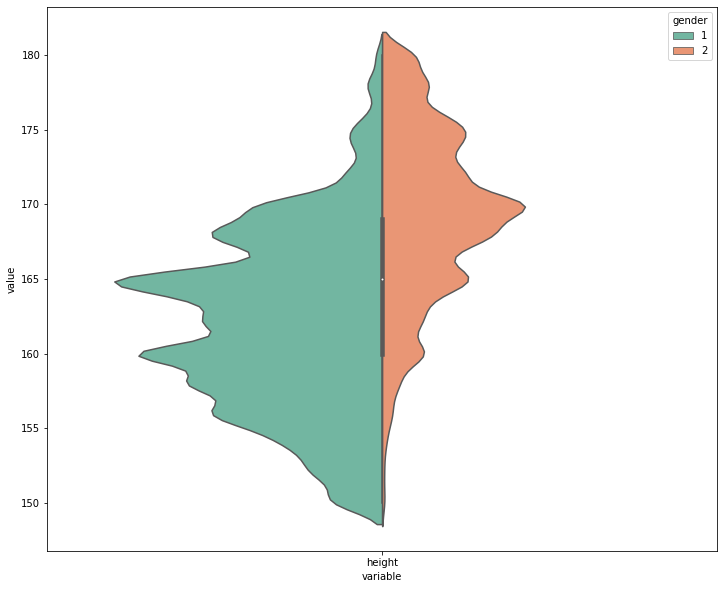

In [19]:
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

### Let's find the outliers in numerical set

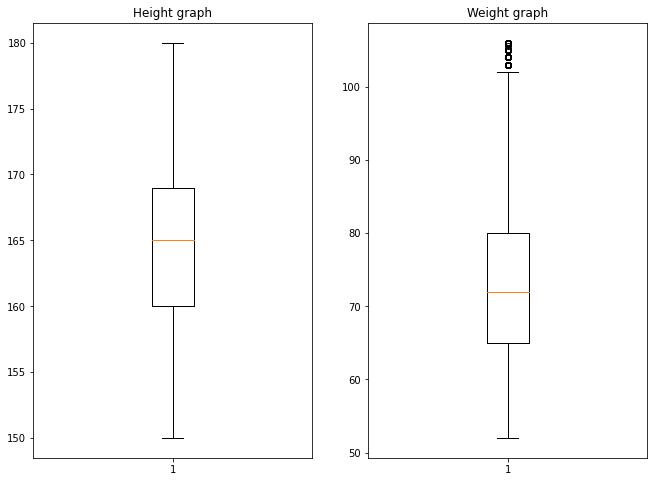

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(df.height)
ax1.set_title('Height graph')
ax2.boxplot(df.weight)
ax2.set_title('Weight graph')
plt.show()

The boxplot above shows some outliers in weight section whose weights are more than 100 kg but we know that there are people in reality with this weight. So we won't count them as outlier as these are most vulnerable to CVD.

Let's also convert the height in metre from centimetres and drop age column from dataset as we have it in the form of ye

In [21]:
df.height = df['height']/100
df.age = df.years
df=df.drop(['years'], axis=1)
df = df.drop(['id'], axis=1)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,1.68,62.0,110,80,1,1,0,0,1,0
1,55,1,1.56,85.0,140,90,3,1,0,0,1,1
2,52,1,1.65,64.0,130,70,3,1,0,0,0,1
3,48,2,1.69,82.0,150,100,1,1,0,0,1,1
4,48,1,1.56,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54,1,1.72,70.0,130,90,1,1,0,0,1,1
69994,58,1,1.65,80.0,150,80,1,1,0,0,1,1
69995,53,2,1.68,76.0,120,80,1,1,1,0,1,0
69998,61,1,1.63,72.0,135,80,1,2,0,0,0,1


## Modelling

In [22]:
# Dividing dataset into X and y
X = df.drop('cardio',axis=1)
y = df.cardio
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,1.68,62.0,110,80,1,1,0,0,1
1,55,1,1.56,85.0,140,90,3,1,0,0,1
2,52,1,1.65,64.0,130,70,3,1,0,0,0
3,48,2,1.69,82.0,150,100,1,1,0,0,1
4,48,1,1.56,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69993,54,1,1.72,70.0,130,90,1,1,0,0,1
69994,58,1,1.65,80.0,150,80,1,1,0,0,1
69995,53,2,1.68,76.0,120,80,1,1,1,0,1
69998,61,1,1.63,72.0,135,80,1,2,0,0,0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [25]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.00292, n_estimators = 2900, max_depth= 7, random_state=13)
xgb.fit(X_train, y_train)

[10:02:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.00292,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2900, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=13,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.4f%%" % (accuracy * 100.0))

Accuracy: 72.8700%


The best result was shown by Xgboost model in this dataset.

## Let's plot the confusion matrix graph for more clarity for our model performance

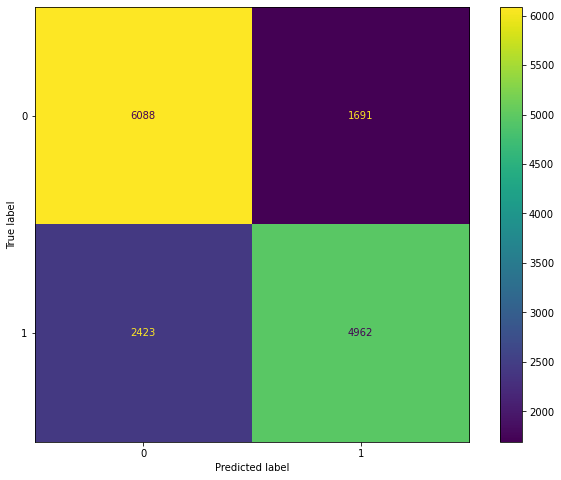

In [27]:
plot_confusion_matrix(xgb, X_test, y_test)

As shown in the graph, the false positive rate of the model is high which is not a good sign specifically for the problem which we are solving here. The accuracy of the model is too fine but not good.

### The overall model performance we can conclude is decent but not good enough to convert it into real-life model.

Now, let's save our model into a json file. 

In [28]:
xgb.save_model('model.json')

## Bonus: Making a voice-enabled interface to make model usable in real-time

A voice assistant which can predict cardiovascular disease.

Note: This will work only in your system not on kaggle.

In [ ]:
import pyttsx3
import pandas as pd
from xgboost import XGBClassifier
engine = pyttsx3.init('sapi5')
voices = engine.getProperty('voices')
engine.setProperty('voice',voices[1])
def speak(audio):
    engine.say(audio)
    engine.runAndWait()

In [ ]:
model = XGBClassifier()
model.load_model('model.json')

In [ ]:
speak('''Hello, You are using Vascular disease detector. I would require certain things
to tell you whether you are suffering from any cardiovascular disease or not. Can you write your age here''')
age = int(input())
speak('Now, tell me your gender. TYPE 1 if male and 2 if female.')
gender = int(input())
speak("Now, it's time to get your height in metres.")
height = float(input())
speak("Now, type your weight dear in kilograms.")
weight = float(input())
speak("Now this is some instrumental requirement. Tell me your higher blood pressure that is systolic blood pressure.")
ap_hi = int(input())
speak("Also enter it's smaller brother lower blood pressure that is diastolic blood pressure")
ap_lo = int(input())
speak('''Now some health needs. Please tell me your cholestrol level, If it is normal, press 1, if it is above normal, press 2
      and if it is much above normal, press 3''')
ch = int(input())
speak('Now tell me something about your glucose level. Give 1 if its normal, 2 for above normal and 3 if it is well above normal')
gluc = int(input())
speak('Now, its time to ask some routine question. If you smoke, press 1 and if not, press 0')
smoke = int(input())
speak('Now press 1 if you consume alcohol and 0 if you do not.')
alco = int(input())
speak('This is our last step now. press 1 if you were physically active between 30 days. If not, press 0')
active = int(input())
data = [{'age':age,'gender':gender,'height':height,'weight':weight,'ap_hi':ap_hi,'ap_lo':ap_lo,'cholestrol':ch,
        'gluc':gluc,'smoke':smoke,'alco':alco,'active':active}]
df_test = pd.DataFrame(data)
pred = model.predict(df_test)
if pred == 0:
    speak("Congratulations, You are out of risk of getting any cardiovascular disease.")
    print("Congratulations, You are out of risk of getting any cardiovascular disease.")
else:
    speak("You are at risk of getting a cardiovascular disease. Please take care of yourself and just do regular check up of yours.")
    print("You are at risk of getting a cardiovascular disease. Please take care of yourself and just do regular check up of yours.")